In [50]:
import cv2,os
import json,random as rd
import scipy
import pandas as pd
import numpy as np
import seaborn as sns
import hvplot.pandas
import holoviews as hv
import matplotlib.pyplot as plt
from datetime import datetime
from PIL import Image

%matplotlib inline

### Path and read data

In [2]:
path="./processed/" # "./gifs/" "./red"

In [3]:
ls=[each for each in os.listdir(path) if ".jpg" in each]
# ls

### Create red only data

In [ ]:
# for each in ls:# if path is "./"

#     img=cv2.imread(each)

#     lower_red = np.array([0,0,0])
#     upper_red = np.array([80,170,255])

#     mask = cv2.inRange(img, lower_red, upper_red)
#     res = cv2.bitwise_and(img,img, mask= mask)

#     # cv2.imshow("name",res)
#     cv2.imwrite("processed/red_"+each,res)# file/pref

### csv read for covid 
make sure it has 1Jan to 31May

In [4]:
df=pd.read_csv("daily-cases-covid-19.csv")
newls=[]
# print(df.values)
for each in df.values:
    # 2,4
    splitted=each[0].split(",")
    newls.append([splitted[2][1:],splitted[4]])
    # print(splitted[2][1:],splitted[4])
# newls

###  Overlay with data
use .py file for imshow stuff

In [5]:
imgBase=cv2.imread("./spain10.PNG")
imgBase=cv2.resize(imgBase,(1456,650))
"(650, 1456)"

compiletime=[]
for each in range(len(ls)):

    img=cv2.imread("./processed/"+ls[each])
    grayed=cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    threshold=grayed[np.where(grayed> 80)]
    print(newls[each][0],newls[each][1],cv2.countNonZero(threshold)//100)#
    compiletime.append([newls[each][0],newls[each][1],cv2.countNonZero(threshold)//100])
#     res = cv2.addWeighted(imgBase,0.5,img,1,0)

#     cv2.imshow("name",res)#cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
#     # cv2.imwrite("gif/gif_"+each,res)
#     cv2.waitKey(300)#30

Jan 1 0 95
Jan 2 0 98
Jan 3 0 71
Jan 4 0 50
Jan 5 0 73
Jan 6 0 114
Jan 7 0 95
Jan 8 0 164
Jan 9 0 107
Jan 10 0 55
Jan 11 0 101
Jan 12 0 208
Jan 13 0 195
Jan 14 0 117
Jan 15 0 82
Jan 16 0 104
Jan 17 0 57
Jan 18 0 20
Jan 19 0 10
Jan 20 0 21
Jan 21 0 15
Jan 22 0 22
Jan 23 0 59
Jan 24 0 54
Jan 25 0 49
Jan 26 0 34
Jan 27 0 60
Jan 28 0 107
Jan 29 0 134
Jan 30 0 79
Jan 31 0 92
Feb 1 1 42
Feb 2 0 90
Feb 3 0 135
Feb 4 0 105
Feb 5 0 70
Feb 6 0 82
Feb 7 0 104
Feb 8 0 65
Feb 9 0 37
Feb 10 1 32
Feb 11 0 163
Feb 12 0 91
Feb 13 0 55
Feb 14 0 50
Feb 15 0 47
Feb 16 0 18
Feb 17 0 31
Feb 18 0 40
Feb 19 0 46
Feb 20 0 80
Feb 21 0 54
Feb 22 0 89
Feb 23 0 60
Feb 24 0 75
Feb 25 1 50
Feb 26 6 14
Feb 27 8 38
Feb 28 18 98
Feb 29 19 37
Mar 1 28 10
Mar 2 54 1
Mar 3 56 25
Mar 4 75 45
Mar 5 81 31
Mar 6 183 0
Mar 7 233 17
Mar 8 330 39
Mar 9 433 29
Mar 10 772 52
Mar 11 975 59
Mar 12 1153 76
Mar 13 1531 32
Mar 14 1683 10
Mar 15 2144 4
Mar 16 1706 18
Mar 17 2503 16
Mar 18 3694 20
Mar 19 4047 14
Mar 20 4569 5
Mar 21 5446

In [31]:
# compiletime
zippy=[]
zippy1=[]

t=[]
c=[]
n=[]

# compileDict={"date":[],"covid":[],"NO2":[]}
for each in compiletime:
    zippy.append((each[0],int(each[1])))
    zippy1.append((each[0],each[2]))
    t.append(each[0])
    c.append(int(each[1]))
    n.append(each[2])
#     compileDict["date"].append(each[0])
#     compileDict["covid"].append(each[1])
#     compileDict["NO2"].append(each[2])

# compileDf=pd.DataFrame.from_dict(compileDict, orient='index').T

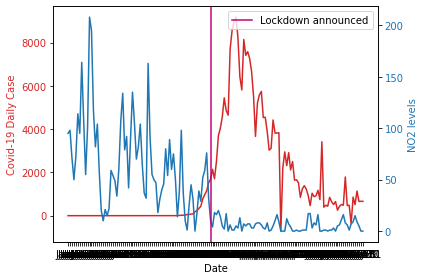

In [51]:
fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel('Date')
ax1.set_ylabel('Covid-19 Daily Case', color=color)
ax1.plot(t, c, color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('NO2 levels', color=color)  # we already handled the x-label with ax1
ax2.plot(t, n, color=color)
ax2.tick_params(axis='y', labelcolor=color)

plt.axvline("Mar 14", 0, 1, label='Lockdown announced',color="xkcd:magenta")
plt.legend()

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.figsize=(300,150)
plt.show()

In [23]:
# compileDf
zippy

[('Jan 1', 0),
 ('Jan 2', 0),
 ('Jan 3', 0),
 ('Jan 4', 0),
 ('Jan 5', 0),
 ('Jan 6', 0),
 ('Jan 7', 0),
 ('Jan 8', 0),
 ('Jan 9', 0),
 ('Jan 10', 0),
 ('Jan 11', 0),
 ('Jan 12', 0),
 ('Jan 13', 0),
 ('Jan 14', 0),
 ('Jan 15', 0),
 ('Jan 16', 0),
 ('Jan 17', 0),
 ('Jan 18', 0),
 ('Jan 19', 0),
 ('Jan 20', 0),
 ('Jan 21', 0),
 ('Jan 22', 0),
 ('Jan 23', 0),
 ('Jan 24', 0),
 ('Jan 25', 0),
 ('Jan 26', 0),
 ('Jan 27', 0),
 ('Jan 28', 0),
 ('Jan 29', 0),
 ('Jan 30', 0),
 ('Jan 31', 0),
 ('Feb 1', 1),
 ('Feb 2', 0),
 ('Feb 3', 0),
 ('Feb 4', 0),
 ('Feb 5', 0),
 ('Feb 6', 0),
 ('Feb 7', 0),
 ('Feb 8', 0),
 ('Feb 9', 0),
 ('Feb 10', 1),
 ('Feb 11', 0),
 ('Feb 12', 0),
 ('Feb 13', 0),
 ('Feb 14', 0),
 ('Feb 15', 0),
 ('Feb 16', 0),
 ('Feb 17', 0),
 ('Feb 18', 0),
 ('Feb 19', 0),
 ('Feb 20', 0),
 ('Feb 21', 0),
 ('Feb 22', 0),
 ('Feb 23', 0),
 ('Feb 24', 0),
 ('Feb 25', 1),
 ('Feb 26', 6),
 ('Feb 27', 8),
 ('Feb 28', 18),
 ('Feb 29', 19),
 ('Mar 1', 28),
 ('Mar 2', 54),
 ('Mar 3', 56),
 ('Mar 4

In [26]:
# hvplot.show(hv.Bars(
#     compileDf["date"],compileDf["covid"]
# ))
# # +
# # hv.Bars(
# #     compileDf, 'date',
# #     "NO2"
# # )
# #            )


hvplot.show(hv.Bars(zippy,"covid"))
# +
# hv.Bars(
#     compileDf, 'date',
#     "NO2"
# )
#            )

In [25]:
hvplot.show(hv.Bars(zippy1,"NO2"))

### create to gif

In [ ]:
# import imageio
# images = []
# for filename in ls:
#     images.append(imageio.imread("./gif/"+filename))
# imageio.mimsave('movie.gif', images)
